#Apply to https://github.com/nihui/waifu2x-ncnn-vulkan (20200606 Version)

##Environment
- when bin_dir is empty, then download from https://github.com/nihui/waifu2x-ncnn-vulkan/releases/download/20200606/waifu2x-ncnn-vulkan-20200606-linux.zip
- input_dir: imput image dir
- output_dir: output image dir
- you can mount your google drive to use it

In [26]:
bin_dir = '' #@param {type: "string"}
input_dir = '/content/data/input' #@param {type: "string"}
output_dir = '/content/data/output' #@param {type: "string"}

In [ ]:
#@title Mount Google Drive only

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

##Video Cut(On Trial)

In [ ]:
video_path = '/content/data/60fps.m4v' #@param {type: "string"}
fps = 60 #@param {type: "number"}

import os
from shutil import rmtree

if os.path.exists(input_dir):
  rmtree(input_dir)

os.makedirs(input_dir)

!ffmpeg -c:v h264_cuvid -i $video_path -r $fps $input_dir'/frame-%6d.png'

##Usages
waifu2x-ncnn-vulkan -i infile -o outfile [options]...

| Option | Description    |
|-|-|
| -h | show this help | 
| -v | verbose output | 
| -i input-path | input image path (jpg/png/webp) or directory |
| -o output-path | output image path (png/webp) or directory |
| -n noise-level | denoise level (-1/0/1/2/3, default=0) |
| -s scale | upscale ratio (1/2, default=2) |
| -t tile-size | tile size (>=32/0=auto, default=0) |
| -m model-path | waifu2x model path (default=models-cunet) |
| -g gpu-id | gpu device to use (default=0) |
| -j load:proc:save | thread count for load/proc/save (default=1:2:2) |
| -x | enable tta mode |
| -f format | output image format (png/webp, default=ext/png) |
| more detail | see [Github](https://github.com/nihui/waifu2x-ncnn-vulkan). |

In [ ]:
!apt install libvulkan-dev

import os
from subprocess import run, DEVNULL
if bin_dir.strip()=='':
  os.chdir('/content')
  !wget https://github.com/nihui/waifu2x-ncnn-vulkan/releases/download/20200606/waifu2x-ncnn-vulkan-20200606-linux.zip
  !unzip -x waifu2x-ncnn-vulkan-20200606-linux.zip
  bin_dir = '/content/waifu2x-ncnn-vulkan-20200606-linux'

noise = 0  #@param {type: "slider", min: -1, max: 3}
scale = 2  #@param {type: "slider", min: 1, max: 2}
tile_size = 0 #@param {type:"integer"}
model_path = 'models-cunet' #@param ["models-cunet", "models-upconv_7_photo", "models-upconv_7_anime_style_art_rgb"]
gpu_id = 0 #@param{type: "integer"}
lps = '1:2:2' #@param {type: "string"}
tta = False #@param {type: "boolean"}
file_format = 'png' #@param {type: "string"}
verbose = True #@param {type:"boolean"}

if os.path.exists(output_dir):
  rmtree(output_dir)

os.makedirs(output_dir)

os.chdir(bin_dir)

cmd = f"./waifu2x-ncnn-vulkan -i {input_dir} -o {output_dir} -n {noise} -s {scale} -t {tile_size} -m {model_path} -g {gpu_id} -j {lps} -f {file_format}"
if tta:
  cmd = cmd + " -x"
if verbose:
  cmd = cmd + " -v"

!echo $cmd
!$cmd

#For Test(Show Image)

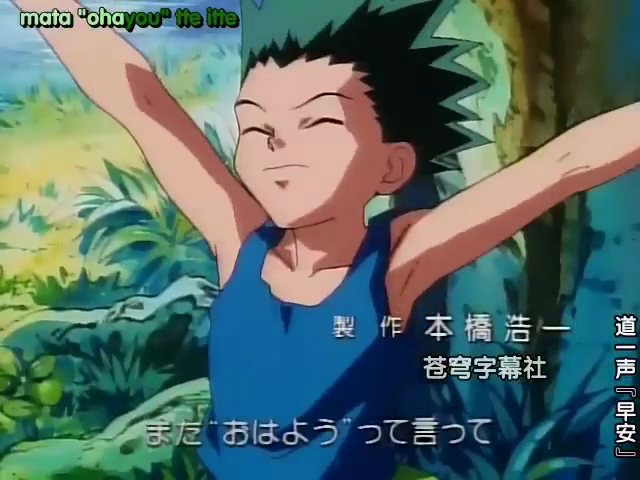

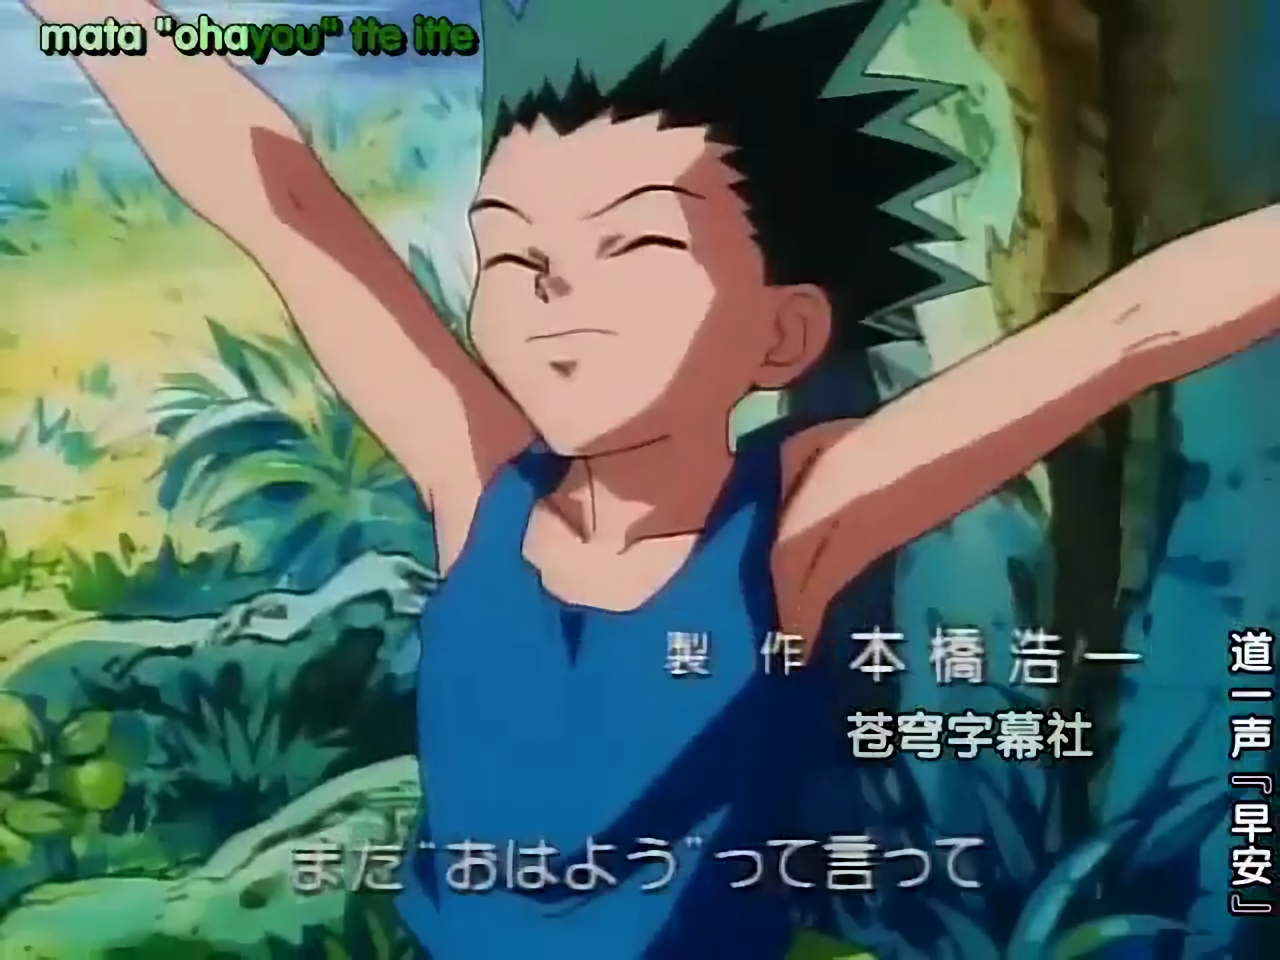

In [86]:
import cv2
from google.colab.patches import cv2_imshow

def show(num):
  _input = input_dir + '/frame-' + str(num) + '.png'
  _output = output_dir + '/frame-' + str(num) + '.png.png'

  for _file in [_input, _output]:
    image = cv2.imread(_file)
    cv2_imshow(image)

show('000329')